# libs + loading data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot

         ppm
year        
1960  316.91
1961  317.64
1962  318.45
1963  318.99
1964  319.62
...      ...
2017  406.76
2018  408.72
2019  411.66
2020  414.24
2021  416.45

[62 rows x 1 columns]


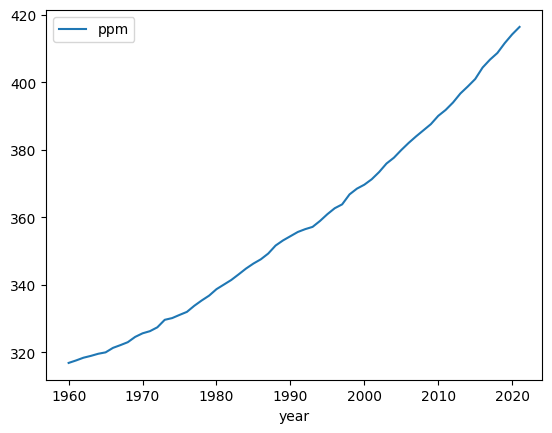

In [2]:
df = pd.read_csv('data.csv')
df.columns=["year","ppm"]

df.set_index('year', inplace=True)
df.plot()
print(df)

# arima

Bibiliography:

https://www.kaggle.com/code/vijaikm/co2-emission-forecast-with-python-seasonal-arima/notebook



Methods to transform non-stationary data to stationary:
- Aggregation: Taking average for time period
- Smoothing: Taking rolling averages
- Polynomial Fitting: Fitting a regression model

In [3]:
def adfuller_test(ppm):
    result = adfuller(ppm)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value, label in zip(result,labels):
        print(f'{label}: {value}' )

    print('Stationary' if result[1] <= 0.05 else 'Non-stationary')

adfuller_test(df['ppm'])

ADF Test Statistic: 5.506786113910213
p-value: 1.0
#Lags Used: 2
Number of Observations: 59
Non-stationary


In [4]:
# # Differencing
# ppm = df['ppm']

# first_difference = ppm - ppm.shift(1)
# pd.TestStationaryPlot(first_difference.dropna(inplace=False))

In [5]:
df['Ppm First Difference'] = df['ppm'] - df['ppm'].shift(1)
df['Seasonal First Difference']=df['ppm']-df['ppm'].shift(12)
df

,ppm,Ppm First Difference,Seasonal First Difference
year,,,
1960,316.91,NaN,NaN
1961,317.64,0.73,NaN
1962,318.45,0.81,NaN
1963,318.99,0.54,NaN
1964,319.62,0.63,NaN
...,...,...,...
2017,406.76,2.35,26.78
2018,408.72,1.96,26.63
2019,411.66,2.94,27.64


In [6]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic: -0.4736386599053144
p-value: 0.8970588895280407
#Lags Used: 0
Number of Observations: 49
Non-stationary


<AxesSubplot:xlabel='year'>

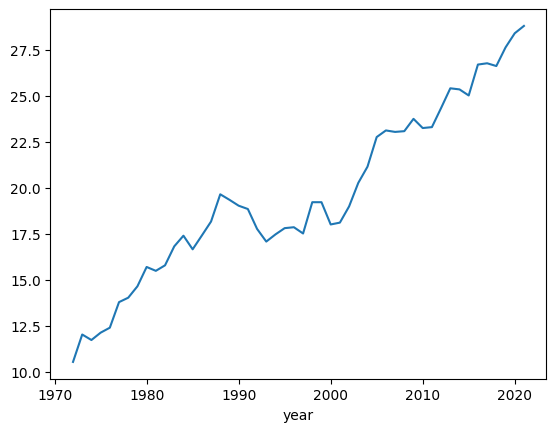

In [7]:
df['Seasonal First Difference'].plot()

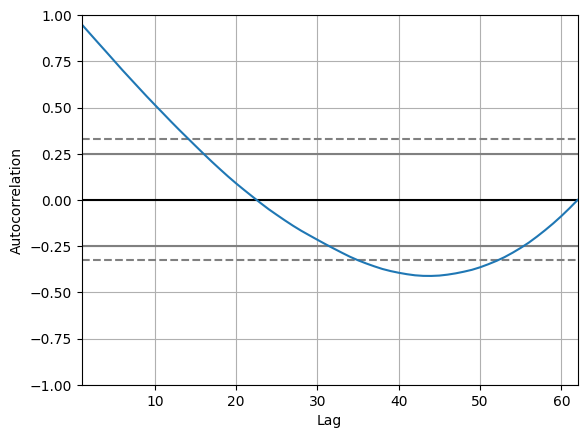

In [8]:
autocorrelation_plot(df['ppm'])
plt.show()

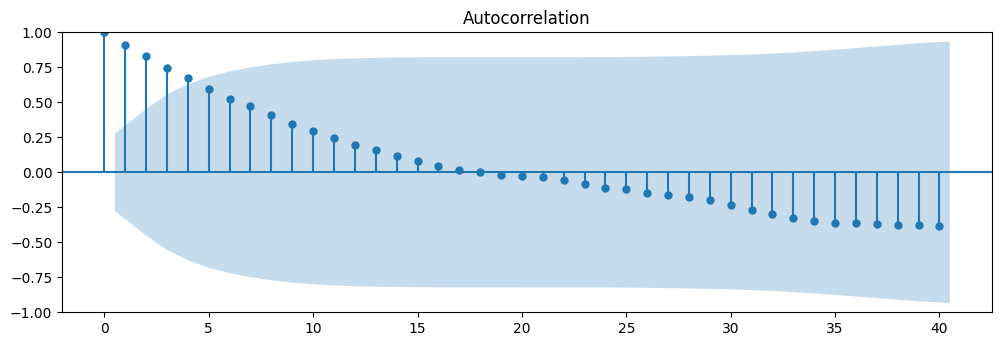

In [9]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].dropna(),lags=40,ax=ax1)

C:\Users\krypt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


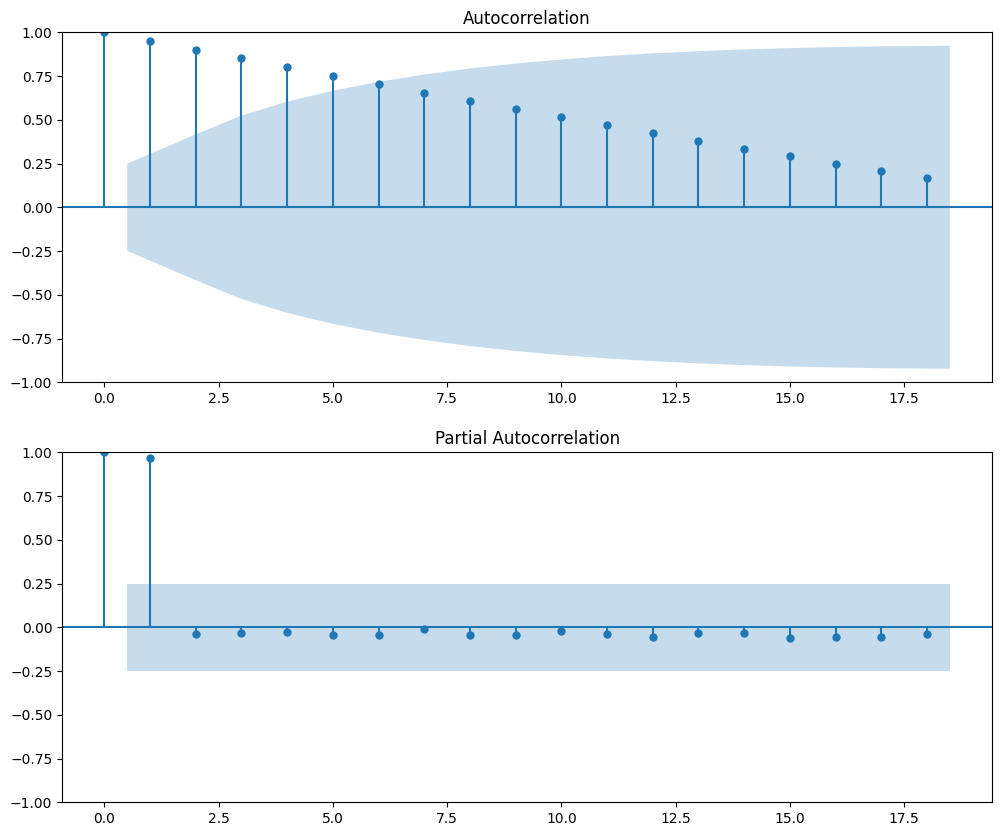

In [15]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['ppm'], ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['ppm'], ax=ax2)

In [10]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(df['ppm'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

C:\Users\krypt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\krypt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\krypt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\krypt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\loca

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    ppm   No. Observations:                   62
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -45.705
Date:                Sat, 12 Nov 2022   AIC                             97.410
Time:                        19:00:50   BIC                            103.743
Sample:                             0   HQIC                            99.892
                                 - 62                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9980      0.005    184.582      0.000       0.987       1.009
ma.L1         -0.7746      0.116     -6.681      0.000      -1.002      -0.547
sigma2         0.2474      0.041      6.107      0.000       0.168       0.327
===================================================================================
Ljung-Box (L1) (Q):                   0.57   Jarque-Bera (JB):                 4.62
Prob(Q):                              0.45   Prob(JB):                         0.10
Heteroskedasticity (H):               0.91   Skew:                             0.66
Prob(H) (two-sided):                  0.84   Kurtosis:                         3.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\Users\krypt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\krypt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='year'>

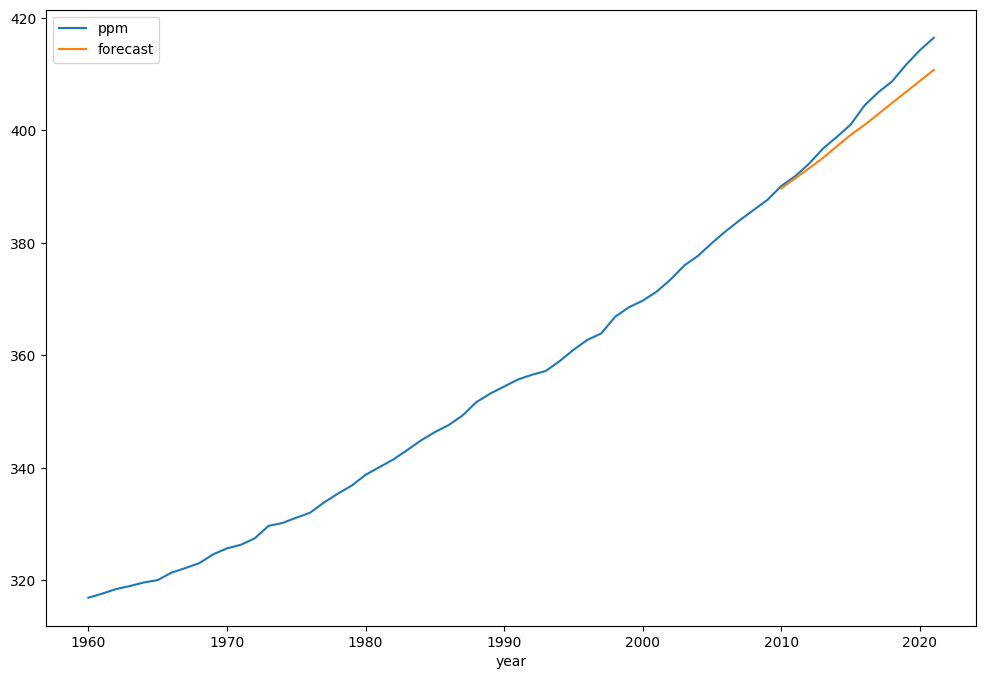

In [11]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['ppm'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
df['forecast']=results.predict(start=50,dynamic=True)
df[['ppm','forecast']].plot(figsize=(12,8))

         ppm  Ppm First Difference  Seasonal First Difference  forecast
1960  316.91                   NaN                        NaN       NaN
1961  317.64                  0.73                        NaN       NaN
1962  318.45                  0.81                        NaN       NaN
1963  318.99                  0.54                        NaN       NaN
1964  319.62                  0.63                        NaN       NaN
...      ...                   ...                        ...       ...
2046     NaN                   NaN                        NaN       NaN
2047     NaN                   NaN                        NaN       NaN
2048     NaN                   NaN                        NaN       NaN
2049     NaN                   NaN                        NaN       NaN
2050     NaN                   NaN                        NaN       NaN

[91 rows x 4 columns]


<AxesSubplot:>

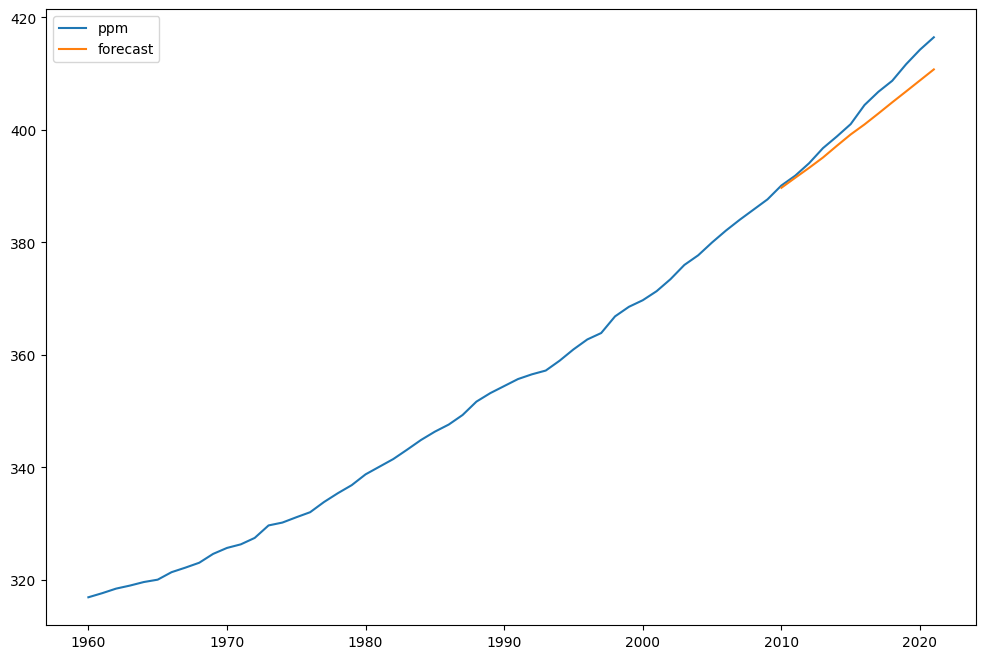

In [12]:
future_dates=[2021+ x for x in range(30)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)
future_df=pd.concat([df,future_datest_df])

future_df['forecast'] = results.predict(start = 50, dynamic= True)
print(future_df)
future_df[['ppm', 'forecast']].plot(figsize=(12, 8))